In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
X = df[['V17', 'V9', 'V6', 'V12']]
Y = df['Class']

In [4]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30,random_state = 101)

In [5]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc1 = accuracy_score(Y_Test,predictionforest)

[[85289    10]
 [   34   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.76      0.83       144

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [6]:
model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc2 = accuracy_score(Y_Test,predictionforest)

[[85288    11]
 [   41   103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.90      0.72      0.80       144

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [7]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

<AxesSubplot:xlabel='param_criterion', ylabel='param_n_estimators'>

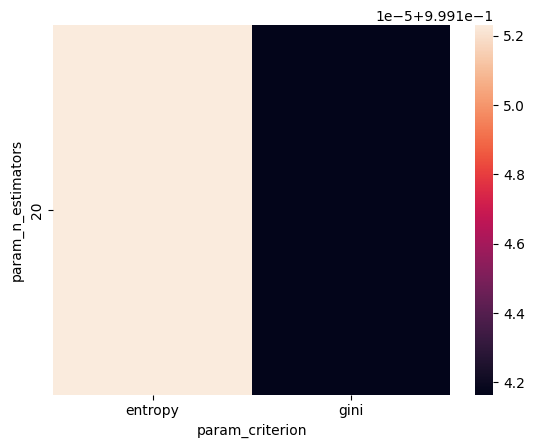

In [8]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [9]:
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc3 = accuracy_score(Y_Test,predictionforest)

[[85281    18]
 [   52    92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.84      0.64      0.72       144

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [10]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_Train,Y_Train)

predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc4 = accuracy_score(Y_Test,predictionforest)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[[85280    19]
 [   41   103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.84      0.72      0.77       144

    accuracy                           1.00     85443
   macro avg       0.92      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [11]:
pip install deap update_checker tqdm stopit

     ------------------------------------ 109.0/109.0 kB 789.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=12019 sha256=d22bc3f72f71ba3c629f8e56fc6c6b7ea93e983ad509cc1a3e7c10e70571f679
  Stored in directory: c:\users\urmi.pandya\appdata\local\pip\cache\wheels\8a\9f\54\c8e1e650852eecadcf9c18e6161f8dda140f1cbc68fa223ef5
Successfully built stopit
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install tpot

     -------------------------------------- 87.2/87.2 kB 818.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
from tpot import TPOTClassifier

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': [10]}
               
tpot_classifier = TPOTClassifier(generations= 4, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_Train,Y_Train) 

C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                            
Generation 1 - Current best internal CV score: 0.9992425914407816
                                                                            
Generation 2 - Current best internal CV score: 0.9992425914407816
                                                                            
Generation 3 - Current best internal CV score: 0.9992425914407818
                                                                            
Generation 4 - Current best internal CV score: 0.9992425914407818
                                                                            
Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10), criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=12, min_samples_split=5, n_estimators=10)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [2],
                                                                        'max_features': ['auto'],
                                                                        'min_samples_leaf': [4,
                                                                                             12],
                                                                        'min_samples_split': [5,
                                                                                              10],
                                                                        'n_estimators': [10]}},
               cv=4, early_stop=12, generations=4, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity

In [14]:
accuracy = tpot_classifier.score(X_Test, Y_Test)
print(accuracy)

0.9992392589211521


C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## ANN Tuning (Artificial Neural Network)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [16]:
def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= 4, activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

In [17]:
# Defining grid parameters
activation = ['softmax', 'relu']
neurons = [5, 10]
optimizer = ['Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

clf = KerasClassifier(build_fn= DL_Model, epochs= 5, batch_size=1024, verbose= 2)

C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  import sys


In [18]:
model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
model.fit(X_Train,Y_Train)

Epoch 1/5
195/195 - 2s - loss: 0.3334 - accuracy: 0.9385 - 2s/epoch - 12ms/step
Epoch 2/5
195/195 - 0s - loss: 0.0562 - accuracy: 0.9981 - 483ms/epoch - 2ms/step
Epoch 3/5
195/195 - 0s - loss: 0.0277 - accuracy: 0.9982 - 432ms/epoch - 2ms/step
Epoch 4/5
195/195 - 0s - loss: 0.0173 - accuracy: 0.9983 - 444ms/epoch - 2ms/step
Epoch 5/5
195/195 - 0s - loss: 0.0127 - accuracy: 0.9983 - 416ms/epoch - 2ms/step


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000014B63C091C8>,
             n_jobs=-1,
             param_grid={'activation': ['softmax', 'relu'], 'neurons': [5, 10],
                         'optimizer': ['Adam', 'Adamax']})

In [19]:
print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))

Max Accuracy Registred: 0.999 using {'activation': 'relu', 'neurons': 10, 'optimizer': 'Adam'}


In [20]:
prediction_test = model.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_test))
print(classification_report(Y_Test,prediction_test))
accuracy_ANN = accuracy_score(Y_Test,prediction_test)

2671/2671 [==============================] - 4s 1ms/step
[[85297     2]
 [  140     4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.67      0.03      0.05       144

    accuracy                           1.00     85443
   macro avg       0.83      0.51      0.53     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
!pip install optuna

     -------------------------------------- 365.7/365.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 9.0 MB/s eta 0:00:00
     -------------------------------------- 153.2/153.2 kB 9.5 MB/s eta 0:00:00
     -------------------------------------- 212.9/212.9 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 4.6 MB/s eta 0:00:00
     ------------------------------------- 192.4/192.4 kB 11.4 MB/s eta 0:00:00


In [22]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target
    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    if classifier_name == 'SVC':
         svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
         classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
    ...
    return accuracy


# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-04-25 15:10:27,192] A new study created in memory with name: no-name-a81ae8d4-21f4-4394-927d-5f9d9f98c433
C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  from ipykernel import kernelapp as app
[I 2023-04-25 15:10:27,238] Trial 0 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 7009.531815589809}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:27,242] Trial 1 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 0.009423194368930387}. Best is trial 0 with value: 0.9992392589211521.
C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2023-04-25 15:10:28,152] Trial 35 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 35848776.58549389}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:28,183] Trial 36 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 137.19822551604057}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:28,202] Trial 37 finished with value: 0.9992392589211521 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 6.072855512477474}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:28,216] Trial 38 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 436.902517024625}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:28,236] Trial 39 finished with value: 0.9992392589211521 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 5.031351412668699}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-

[I 2023-04-25 15:10:29,082] Trial 74 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 915.9718648651917}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:29,100] Trial 75 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 17.522144581953988}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:29,152] Trial 76 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 8594.85624470197}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:29,171] Trial 77 finished with value: 0.9992392589211521 and parameters: {'classifier': 'SVC', 'svc_c': 156.96537538982122}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:29,214] Trial 78 finished with value: 0.9992392589211521 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.0527519550852076}. Best is trial 0 with value: 0.9992392589211521.
[I 2023-04-25 15:10:29

In [23]:
!pip install parameter-sherpa

     -------------------------------------- 513.5/513.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 382.2/382.2 kB 12.0 MB/s eta 0:00:00
     -------------------------------------- 101.8/101.8 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 8.1 MB/s eta 0:00:00
     ------------------------------------- 283.7/283.7 kB 17.1 MB/s eta 0:00:00
     ---------------------------------------- 71.3/71.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for parameter-sherpa: filename=parameter

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

In [25]:
parameters = [sherpa.Discrete('n_estimators', [2, 50]),
              sherpa.Choice('criterion', ['gini', 'entropy']),
              sherpa.Continuous('max_features', [0.1, 0.9])]

algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)